por: Matheus Araujo
## Resumo da aula Prática:

* (80%) Introdução a Classificadores Lineares: Passo a Passo
* (20%) Utilizando Classificador linear para iris setosa

In [1]:
from numpy.random import normal
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np


In [2]:
#Criando bolas azuis
bolas_azuis = {}
azul_peso_media = 80
azul_raio_media = 150
azul_peso_std = 10
azul_raio_std = 30

bolas_azuis["peso"] = normal(azul_peso_media, 10, 100)
bolas_azuis["raio"] = normal(azul_raio_media, 15, 100)
bolas_azuis["classe"] = "azul"
bolas_azuis_df = pd.DataFrame(bolas_azuis) 

#Criando bolas vermelhas
bolas_vermelhas = {}
vermelho_peso_media = 60
vermelho_raio_media = 110
vermelho_peso_std = 10
vermelho_raio_std = 10

bolas_vermelhas["peso"] = normal(vermelho_peso_media, vermelho_peso_std, 100)
bolas_vermelhas["raio"] = normal(vermelho_raio_media, vermelho_raio_std, 100)
bolas_vermelhas["classe"] = "vermelho"
bolas_vermelhas_df = pd.DataFrame(bolas_vermelhas) 
print(bolas_vermelhas_df.head())
print(bolas_azuis_df.head())

        peso        raio    classe
0  64.057949  114.246228  vermelho
1  75.298249  120.682203  vermelho
2  62.021909  124.778560  vermelho
3  59.194688  105.498387  vermelho
4  61.749398  120.345307  vermelho
        peso        raio classe
0  89.184450  144.715972   azul
1  74.307286  141.039123   azul
2  92.230216  149.995287   azul
3  69.313322  144.425207   azul
4  62.358188  131.916161   azul


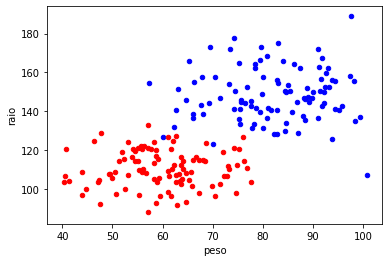

In [32]:
# Plotando todas as bolas
ax = bolas_azuis_df.plot.scatter("peso", "raio", c="b")
ax = bolas_vermelhas_df.plot.scatter("peso", "raio",ax=ax, c="r")

In [4]:
# Colocando as bolas dentro do mesmo caixa
caixa_original_df = pd.concat([bolas_azuis_df, bolas_vermelhas_df])

# Certifica que cada bola tem um index unico
mapa_cor_classe = {
    "vermelho" : 1,
    "azul" : 0
}
caixa_original_df = caixa_original_df.reset_index(drop=True)
caixa_original_df["classe"] = caixa_original_df["classe"].apply(lambda classe: mapa_cor_classe[classe])
print("Numero de bolas: {}, Numero de Colunas: {}".format(caixa_original_df.shape[0], caixa_original_df.shape[1]))

Numero de bolas: 200, Numero de Colunas: 3


In [5]:
#Chacoalhando a caixa
caixa_original_df = caixa_original_df.sample(frac=1)
caixa_original_df.head()

,peso,raio,classe
92,87.989221,137.455994,0
114,49.921686,105.687599,1
194,40.329725,103.510432,1
44,93.138246,152.743702,0
9,88.982598,147.548931,0


In [6]:
#Pegando uma amostra de N bolas da caixa e plotando
amostra_df = caixa_original_df.sample(n=80) # Pegando amostra de N bolas
caixa_df = caixa_original_df.drop(amostra_df.index) # Removendo bolas da caixa

print("Bolas na caixa: {}, Bolas na amostra: {}".format(caixa_df.shape[0], amostra_df.shape[0]))

Bolas na caixa: 120, Bolas na amostra: 80


# Voce conseguiria adivinhar qual é classe de cada bola?

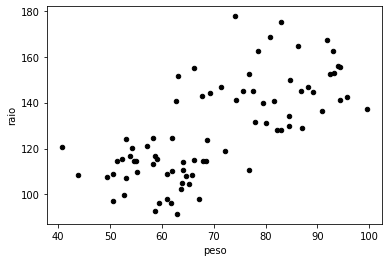

In [7]:
amostra_df.plot.scatter("peso","raio", c="k")

             peso                  raio           
             mean       std        mean        std
classe                                            
0       82.547946  9.509509  147.279368  12.949382
1       59.285147  7.395829  110.401038   8.885472


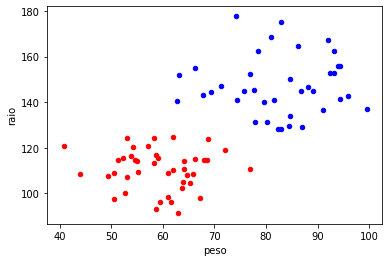

In [8]:
# Imprimindo media e desvio padrão de cada feature na amostra
print(amostra_df.groupby("classe").agg(["mean", "std"]))

# Separando bolas azuis e bolas vermelhas da amostra
bolas_azuis_amostra = amostra_df[amostra_df["classe"] == 0]
bolas_vermelhas_amostra = amostra_df[amostra_df["classe"] == 1]

# Mostrando a cor da amostra
ax = bolas_azuis_amostra.plot.scatter("peso", "raio", c="b")
bolas_vermelhas_amostra.plot.scatter("peso", "raio", ax=ax, c="r")


In [9]:
#É comum usar 42 como random_state (para mais informações consulte
#o guia do mochileiro das galáxias.)

#Definindo classificador
clf = LogisticRegression()

# Definindo vetores de features
X = amostra_df[["peso", "raio"]].values

# Definindo vetor da variavel alvo
Y = amostra_df["classe"].values

# Treinando o classificador com os dados da amostra
clf.fit(X,Y)

/home/matheus/personal_python/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
#Função auxiliar para plotar o hiperplano do classificador linear
def plot_hiperplano(clf,x_min,x_max,y_min,y_max, ax=None):
    
    w = clf.coef_[0]
    # Criando hiperplano (linha)
    m = -w[0] / w[1]
    xx = np.linspace(x_min, x_max)
    
    # Formula da reta: a*x + by + c = 0
    # Logo: y = -ax/b -c/b    
    yy = m * xx - (clf.intercept_[0]) / w[1]
    # Plotando hiperplano
    if ax:
        ax.plot(xx, yy)
    else:        
        plt.plot(xx, yy)
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        
        


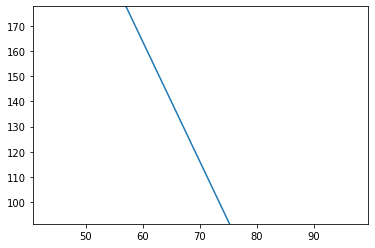

In [11]:
# Plotando o Classificador linear
x_min = amostra_df["peso"].min()
x_max = amostra_df["peso"].max()
y_min = amostra_df["raio"].min()
y_max = amostra_df["raio"].max()
plot_hiperplano(clf,x_min,x_max,y_min,y_max)

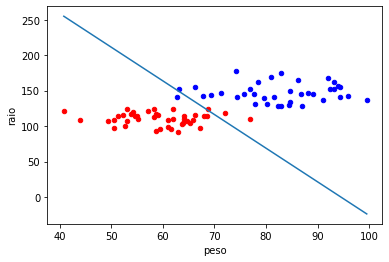

In [12]:
# Plotando o classificador linear junto com nossa amostra
ax = amostra_df[amostra_df["classe"] == 0].plot.scatter("peso", "raio", c="b")
amostra_df[amostra_df["classe"] == 1].plot.scatter("peso", "raio", ax=ax, c="r")
plot_hiperplano(clf,x_min,x_max,y_min,y_max, ax)

## Qual é a performance do nosso classificador na amostra?

In [13]:
acuracia_media_amostra = clf.score(X,Y)
print("Acuracia Media", acuracia_media_amostra)

Acuracia Media 0.95


# Vamos retirar mais bolas

In [14]:
# Pegando primeira bola da caixa e utilizando o classificador
bola_x = caixa_df.iloc[0] # Escolhendo bola
caixa_df = caixa_df.drop(bola_x.name, errors="ignore") # Removendo bola
print("Bolas na Caixa: {}".format(caixa_df.shape[0]))
print("Bola Removida:")
bola_x

Bolas na Caixa: 119
Bola Removida:


peso       87.989221
raio      137.455994
classe      0.000000
Name: 92, dtype: float64

In [15]:
classe_prevista = clf.predict(bola_x[["peso", "raio"]].values.reshape(1,-1))[0]
print("Classe Prevista: {}".format(classe_prevista))

Classe Prevista: 0


In [16]:
mapa_class_cor = {
    1 : "vermelho",
    0 : "azul"
}
print("Classe Prevista: {}".format(mapa_class_cor[classe_prevista]))

Classe Prevista: azul


# Classificando o resto da caixa

In [17]:
print("Bolas na caixa: {}".format(caixa_df.shape[0]))

Bolas na caixa: 119


In [18]:
bolas_previsoes = clf.predict(caixa_df[["peso", "raio"]].values)
bolas_previsoes_cores = list(map(lambda classe: mapa_class_cor[classe], bolas_previsoes))
print("Primeiras 10 bolas na caixa são: {}".format(bolas_previsoes_cores[:10]))

Primeiras 10 bolas na caixa são: ['vermelho', 'vermelho', 'azul', 'azul', 'azul', 'vermelho', 'vermelho', 'azul', 'azul', 'vermelho']


In [19]:
caixa_df["previsao"] = bolas_previsoes
caixa_df.head()

,peso,raio,classe,previsao
114,49.921686,105.687599,1,1
194,40.329725,103.510432,1,1
9,88.982598,147.548931,0,0
31,78.647688,141.765864,0,0
71,75.409283,133.589012,0,0


## Qual é a performace do nosso classificador para o resto da caixa?

**!Importante:** Lembre-se que o classficador foi treinado com as amostras. As bolas dentro da caixa nunca foram vistas antes.

In [20]:
X_caixa = caixa_df[["peso", "raio"]].values 
Y_caixa = caixa_df[["classe"]].values
acuracia_media_caixa = clf.score(X_caixa, Y_caixa)
print("Acuracia média na caixa: {:.2f}%".format(acuracia_media_caixa*100))

Acuracia média na caixa: 88.24%


## Desmitificando cálculo da acurácia média

In [33]:
total = caixa_df.shape[0]
acertou = 0
for index, bola in caixa_df.iterrows():
    if bola["classe"] == bola["previsao"]:
        acertou += 1
print("Acertou: {}\nErrou: {}\nAcuracia na Caixa: {:.2f}%".format(acertou, total - acertou, (acertou/total) * 100))

Acertou: 105
Errou: 14
Acuracia na Caixa: 88.24%


Acuracia Amostra: 0.95, Acuracia Caixa: 0.8823529411764706 


Text(0.5, 1.0, 'Desempenho do Classificador de Bolas')

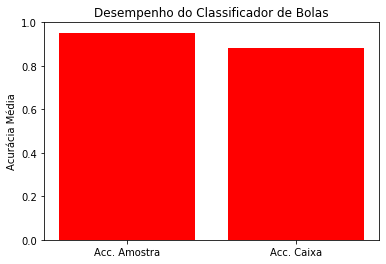

In [34]:
print("Acuracia Amostra: {}, Acuracia Caixa: {} ".format(acuracia_media_amostra, acuracia_media_caixa))

# Utilizando matplotlib para fazer um grafico de barras
acuracias_nomes = ['Acc. Amostra', 'Acc. Caixa']
y_pos = np.arange(len(acuracias_nomes))
acuracias = [acuracia_media_amostra, acuracia_media_caixa]
plt.bar(y_pos, acuracias, align='center', color="r")

# Colocando nomes no eixo
plt.xticks(y_pos, acuracias_nomes)
plt.ylim(0,1)
plt.ylabel('Acurácia Média')
plt.title('Desempenho do Classificador de Bolas')

# Classificando uma caixa de iris

In [35]:
from  sklearn import  datasets
iris=datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                       columns= iris['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [36]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [37]:
# Vamos trabalhar com 2 classes: setosa and virginica
iris_df = iris_df[iris_df["target"] != 1]

# Vamos trabalhar apenas com 2 features: sepal length and sepalwidth
iris_df = iris_df[["sepal length (cm)", "sepal width (cm)", "target"]]

iris_df.head()

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0.0
1,4.9,3.0,0.0
2,4.7,3.2,0.0
3,4.6,3.1,0.0
4,5.0,3.6,0.0


Text(0.5, 1.0, 'Plot iris Setosa(verde) e Virginica(magenta)')

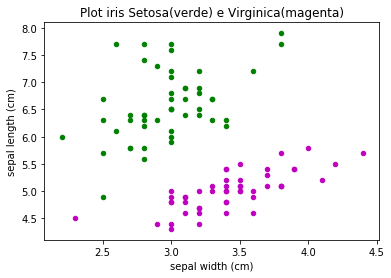

In [38]:
# Plot iris Setosa e Virginica
ax = iris_df[iris_df["target"] == 0.0].plot.scatter("sepal width (cm)", "sepal length (cm)", c="m")
ax = iris_df[iris_df["target"] == 2.0].plot.scatter("sepal width (cm)", "sepal length (cm)",ax=ax, c="g")
ax.set_title("Plot iris Setosa(verde) e Virginica(magenta)")

In [27]:
#Chacoalhando a caixa de iris 
#Pegando uma amostra aleatória de N iris da caixa
iris_amostra_df = iris_df.sample(n=30)
iris_caixa_df = iris_df.drop(iris_amostra_df.index) # Removendo bolas da caixa

print("Iris na caixa: {}, Iris na amostra: {}".format(iris_caixa_df.shape[0], iris_amostra_df.shape[0]))

Iris na caixa: 70, Iris na amostra: 30


In [28]:
#Definindo classificador
clf = LogisticRegression()

# Definindo vetores de features
X = iris_amostra_df[["sepal width (cm)", "sepal length (cm)"]].values

# Definindo vetor da variavel alvo
Y = iris_amostra_df["target"].values

# Treinando o classificador com os dados da amostra
clf.fit(X,Y)
acuracia_media_amostra_iris = clf.score(X,Y)

/home/matheus/personal_python/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Acuracia Media Amostra 1.0


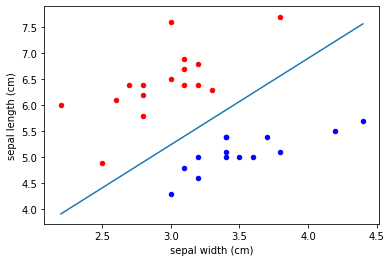

In [40]:
x_min = iris_amostra_df["sepal width (cm)"].min()
x_max = iris_amostra_df["sepal width (cm)"].max()
y_min = iris_amostra_df["sepal length (cm)"].min()
y_max = iris_amostra_df["sepal length (cm)"].max()

# Plotando o classificador linear junto com nossa amostra
ax = iris_amostra_df[iris_amostra_df["target"] == 0].plot.scatter("sepal width (cm)", "sepal length (cm)", c="b")
iris_amostra_df[iris_amostra_df["target"] == 2].plot.scatter("sepal width (cm)", "sepal length (cm)", ax=ax, c="r")

plot_hiperplano(clf,x_min, x_max, y_min, y_max, ax)

print("Acuracia Media Amostra", acuracia_media_amostra_iris)

Acuracia Media Caixa 0.9857142857142858


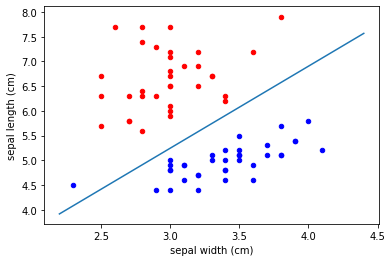

In [41]:
# Definindo vetores de features
X_caixa = iris_caixa_df[["sepal width (cm)", "sepal length (cm)"]].values

# Definindo vetor da variavel alvo
Y_caixa = iris_caixa_df["target"].values

acuracia_media_caixa_iris = clf.score(X_caixa,Y_caixa)

# Plotando o classificador linear junto com nossa amostra
ax = iris_caixa_df[iris_caixa_df["target"] == 0].plot.scatter("sepal width (cm)", "sepal length (cm)", c="b")
iris_caixa_df[iris_caixa_df["target"] == 2].plot.scatter("sepal width (cm)", "sepal length (cm)", ax=ax, c="r")

plot_hiperplano(clf,x_min, x_max, y_min, y_max, ax)

print("Acuracia Media Caixa", acuracia_media_caixa_iris)

Acuracia Amostra: 1.0, Acuracia Caixa: 0.9857142857142858 


Text(0.5, 1.0, 'Desempenho do Classificador de Bolas')

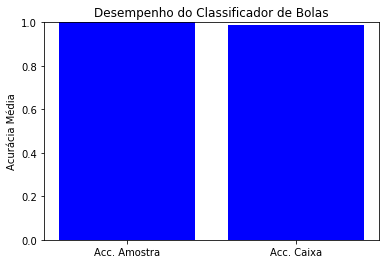

In [39]:
print("Acuracia Amostra: {}, Acuracia Caixa: {} ".format(acuracia_media_amostra_iris, acuracia_media_caixa_iris))

# Utilizando matplotlib para fazer um grafico de barras
acuracias_nomes = ['Acc. Amostra', 'Acc. Caixa']
y_pos = np.arange(len(acuracias_nomes))
acuracias = [acuracia_media_amostra_iris, acuracia_media_caixa_iris]
plt.bar(y_pos, acuracias, align='center', color="b")

# Colocando nomes no eixo
plt.xticks(y_pos, acuracias_nomes)
plt.ylim(0,1)
plt.ylabel('Acurácia Média')
plt.title('Desempenho do Classificador de Bolas')

# Agora é sua vez: Crie um classificador linear para os sobreviventes do Titanic

* Dica: Dê uma olhada no notebook da aula 05 ( na última parte trabalhamos com o conjunto de dados do Titanic)

### 1 - Carregue o conjunto de dados do Titanic


### 2 - Selecione as features Age, Sex para prever Survived. Seu dataset precisa ter 3 colunas



### 3 - Discretize a feature Sex. Transformado o tipo do dado de string para integer

### 4 - Limpe os dados removendo as linhas com valores nulos. (Dica: .dropna)

### 5 - Visualize o conjunto de dados. (Dica: normalize os dados). No eixo X a idade e no eixo Y o sexo

### 6 - Remova uma amostra do seu conjunto de dados (não esqueça de remover a amostra do conjunto de dados original)

### 7 - Treine um classificador linear utilizando sua amostra e imprima sua acuracia

### 8 - Utilize o classificador linear treinado para classificar o restante dos dados que não foram usados no treinamento e imprima sua acuracia